In [ ]:
from pylab import*

In [ ]:
import numpy as np
import scipy.stats
import seaborn as sns
from scipy.special import gamma
from scipy.stats import beta
from scipy.stats import spearmanr

In [ ]:
import pandas as pd

In [ ]:
ruta = "/Users/Ralmw/Documents/Clases/Machine Learning/Tarea 1/Tarea 1/"

In [ ]:
bd = "data_schools.xlsx"

In [ ]:
bd_escuelas = pd.read_excel(ruta+bd)
bd_escuelas

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


 Medir la precisión de un estimador, de un índíce , de un estadistico que nos interesa. Vamos a medir la precisión utilizando el error estándar. 

Datos de escuelas que se seleccionaron al azar, prueba nacional que se calcula en función a puntajes, y calcularón el promedio de puntajes que se obtuvo al hacer esa prueba. Internamente la escuel. Se QUIERE MEDIR LA CORRELACIÓN ENTRE UN PUNTAJE Y OTRO. 

In [ ]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random= bd_escuelas.sample(n=15, random_state=9998)[["escuela"]]
escuelas_random

,escuela
37,38
51,52
75,76
5,6
73,74
21,22
57,58
10,11
35,36
39,40


In [ ]:
escuelas_random = pd.merge(escuelas_random , bd_escuelas, how="left", on=["escuela"])
escuelas_random

,escuela,LSAT,GPA
0,38,606,3.20
1,52,580,3.07
2,76,608,3.16
3,6,576,3.39
4,74,565,3.15
5,22,614,3.19
6,58,631,3.21
7,11,558,3.11
8,36,572,2.88
9,40,535,2.98


In [ ]:
corr,_= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)
corr

0.6587916487636006

In [ ]:
bd_escuelas = pd. merge(bd_escuelas, escuelas_random, how="left", on= ["escuela"])
bd_escuelas["f_seleccion"] = bd_escuelas["f_seleccion"].fillna(0)
bd_escuelas["f_seleccion"] = bd_escuelas["f_seleccion"].astype(int)
bd_escuelas

,escuela,LSAT,GPA,f_seleccion
0,1,622,3.23,0
1,2,542,2.83,0
2,3,579,3.24,0
3,4,653,3.12,0
4,5,606,3.09,0
...,...,...,...,...
77,78,590,3.15,0
78,79,558,2.81,0
79,80,611,3.16,0
80,81,564,3.02,0


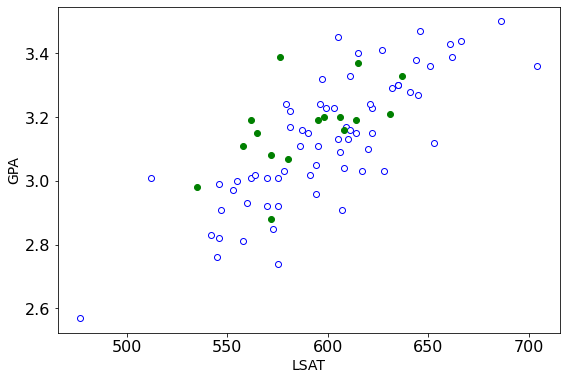

In [ ]:
fig,ax= plt. subplots(figsize=(9,6))
plot(bd_escuelas[bd_escuelas["f_seleccion"]==0].LSAT, 
    bd_escuelas[bd_escuelas["f_seleccion"]==0].GPA, 'o', color='blue',markerfacecolor='white')
plot(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, 
     bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA, 'o', color='green')

xlabel("LSAT", size=14)
ylabel("GPA", size =14)
xticks(fontsize = 16)
yticks(fontsize=16)
show()

In [ ]:
corr,_= spearmanr(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA)
print('Spermans correlation: %.3f' % corr)

Spermans correlation: 0.659


In [ ]:
corr,_=spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)
print('Spermans correlation: %.3f'% corr)

Spermans correlation: 0.753


Medir la precisión de seleccionar 15 muestras al azar

In [ ]:
    1.- Obterm el  error estandár de la correlación y mostrar  para que N la precisión es mejor con respecto a la correlació  total.
    Donde N es el número de simulaciones que voy a hacer, número muestras boostrp que voya a hacer con 15 elementos.
    Seleccionar en cada ejecucion 15 datos de la base y se van a medir la correlación.
    2. Que tan eficiente es tomar 15 datos y hacer el remuestreo.

Calcular el error estandar y la correlación.k

Agarran en cada iteración 15 datos diferentes.  Graficar un histograma de la correlación, ver el promedio de la correlación de todas las combinaciones. Cuantas muestra voy a hacer . cuántas simulaciones se vna a hacer.

Calcular la correlación sobre la muestra completa.Seleccionar al hazar , y el muestreo boostrap va a hacer sobre los 82 datos

cruzzr las muestras con la base en cada iteración, merge que se hace en cada iteración.

In [ ]:
La correlación depende de dos variables.
Cuando se haga la selección al azar de los datos. A hora tengo que ver que GPA le corresponde 

In [ ]:
corrs = np.array([])

for i in range(100):
    #Seleccionamos aleatoriamente 15 escuelas
    escuelas_random= bd_escuelas.sample(n=15)[["escuela"]]

    escuelas_random = pd.merge(escuelas_random , bd_escuelas, how="left", on=["escuela"])

    corr,_= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)
    corrs = np.append(corrs, corr)
    
a = percentile(corrs, 0.025)
b = percentile(corrs, 0.975)


In [ ]:
a

0.24364486409501243

In [ ]:
b

0.257069198811031

In [ ]:
b-a

0.013424334716018588

In [ ]:
dist = []

for j in range(10,1000):
    corrs = np.array([])

    for i in range(100):
        #Seleccionamos aleatoriamente 15 escuelas
        escuelas_random= bd_escuelas.sample(n=15)[["escuela"]]

        escuelas_random = pd.merge(escuelas_random , bd_escuelas, how="left", on=["escuela"])

        corr,_= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)
        corrs = np.append(corrs, corr)

    a = percentile(corrs, 0.025)
    b = percentile(corrs, 0.975)
    res = [a, b, b-a, j]
    dist.append(res)
dist

In [ ]:
minimo = min(dist, key=lambda a: a[2] )
minimo

[0.0012957182692527325, 17]